In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import MACD
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'spy'
stock = Stock(ticker, config='../config.toml.example')
stock.load_data()
stock.snip_dates('2019-01-01', '2020-12-31')

In [3]:
# Calculate MACD signals
macd_signal = MACD(stock)

In [4]:
%%time
# Run simulation
sim = Simulation(macd_signal.stock_obj)
sim.paper_trade()

CPU times: user 11.2 s, sys: 340 ms, total: 11.6 s
Wall time: 12.2 s


In [5]:
sim.calc_pnl()

spy simulation PnL: $103,660


In [6]:
doberplot = DoberPlot(stock)

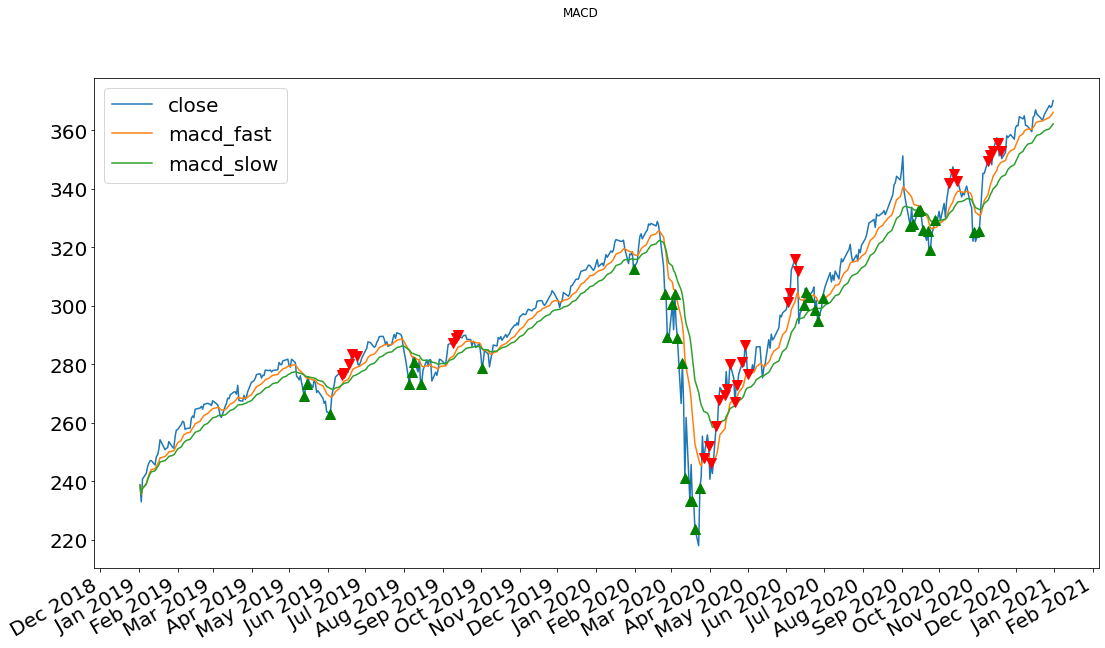

In [7]:
doberplot.order_signal(strategy_name='macd')

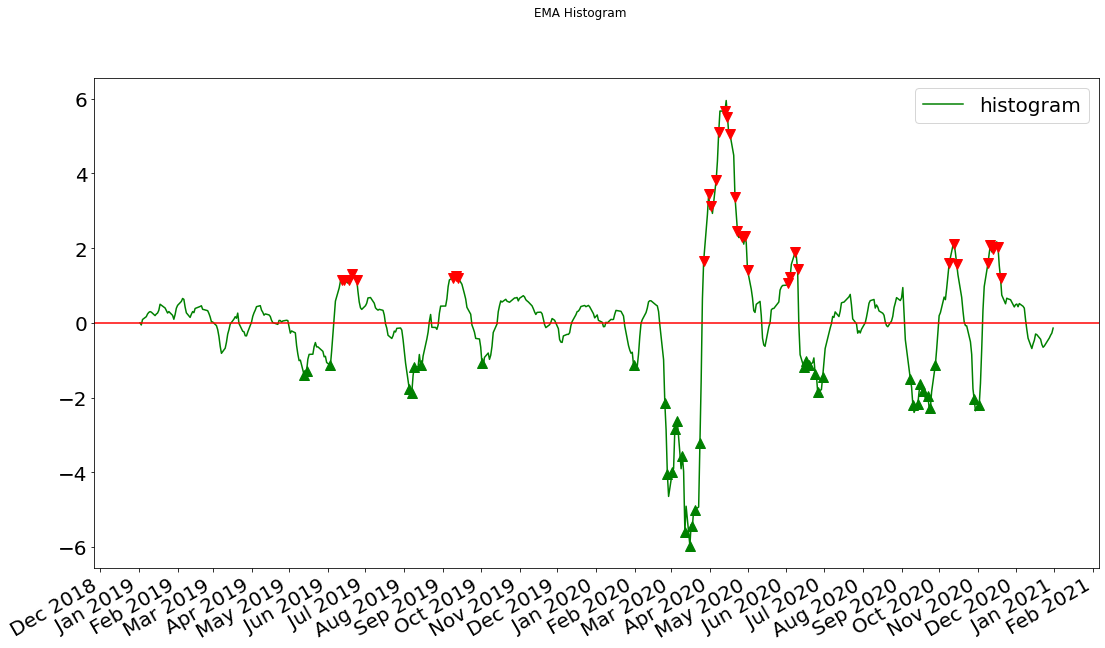

In [8]:
doberplot.histogram(strategy="macd")